In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

data = pd.read_csv('D:/Downloads/airline-safety.csv')
data.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [3]:
# Summary of the data types and value counts

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
airline                   56 non-null object
avail_seat_km_per_week    56 non-null int64
incidents_85_99           56 non-null int64
fatal_accidents_85_99     56 non-null int64
fatalities_85_99          56 non-null int64
incidents_00_14           56 non-null int64
fatal_accidents_00_14     56 non-null int64
fatalities_00_14          56 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [4]:
# Generate summary statistics.

data.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [5]:
# Calculate the total incidents from 85 to 99

total_incidents_85_99 = np.sum(data['incidents_85_99'])
total_incidents_85_99

402

In [6]:
# Calculate the total incidents from 00 to 14

total_incidents_00_14 = np.sum(data['incidents_00_14'])
total_incidents_00_14

231

([<matplotlib.axis.XTick at 0x2608009fa08>,
 <a list of 2 Text xticklabel objects>)

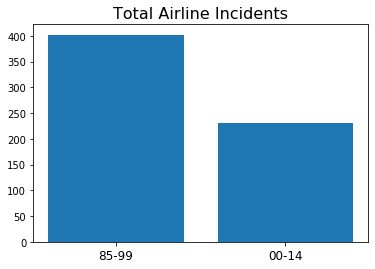

In [7]:
# Compare the total airline incidents between two periods.

plt.bar(range(2), [total_incidents_85_99, total_incidents_00_14])
plt.title('Total Airline Incidents', fontsize = 16)
plt.xticks(range(2), ['85-99', '00-14'], fontsize = 12)

In [8]:
# Calculate the total fatal incidents between 85 to 99

total_fatal_incidents_85_99 = np.sum(data['fatal_accidents_85_99'])
total_fatal_incidents_85_99

122

In [9]:
# Calculate the total fatal incidents between 00 to 14

total_fatal_incidents_00_14 = np.sum(data['fatal_accidents_00_14'])
total_fatal_incidents_00_14

37

([<matplotlib.axis.XTick at 0x2608137fe88>,
 <a list of 2 Text xticklabel objects>)

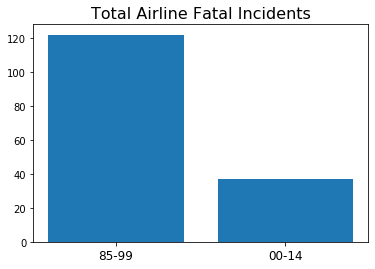

In [10]:
# Compare the total airline fatal incidents between two periods.

plt.bar(range(2), [total_fatal_incidents_85_99, total_fatal_incidents_00_14])
plt.title('Total Airline Fatal Incidents', fontsize = 16)
plt.xticks(range(2), ['85-99', '00-14'], fontsize = 12)

In [11]:
# Load data

air_passengers = pd.read_excel('D:/Downloads/Number of Air Passengers Carried in the US.xlsx', skiprows=2)
air_passengers.head()

,Date,Units (Persons)
0,2019,8.949152e+08
1,2018,8.890220e+08
2,2017,8.494030e+08
3,2016,8.240390e+08
4,2015,7.982220e+08


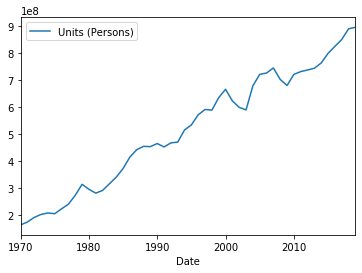

In [12]:
# Air passengers increase.

air_passengers[::-1][4:].plot(x = 'Date', y = 'Units (Persons)')

In [13]:
# Load data

revenue = pd.read_excel('D:/Downloads/passenger revenue.xlsx')
revenue.head()

,Year,Revenue
0,1995,69469.96668
1,1996,75285.66242
2,1997,79470.78538
3,1998,80985.23448
4,1999,84317.49959


Text(0, 0.5, 'Revenue')

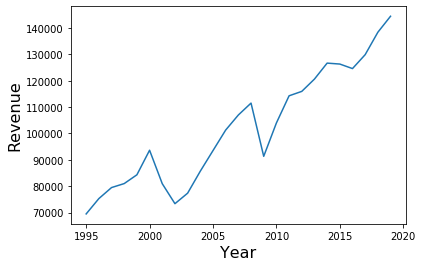

In [14]:
# Plot the industry (airlines) revenue trends from 1995 to 2020

plt.plot(revenue['Year'], revenue['Revenue'])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Revenue', fontsize=16)

In [15]:
# Load data

death = pd.read_excel('D:/Downloads/Book1.xlsx', skiprows=1)
death.head()

,Unnamed: 0,Journeys,Hours,km
0,Bus,4.3,11.1,0.4
1,Rail,20.0,30.0,0.6
2,Van,20.0,60.0,1.2
3,Car,40.0,130.0,3.1
4,Foot,40.0,220.0,54.2


In [16]:
# Rename column names

death.columns = ['Type', 'Journeys', 'Hours', 'km']

Text(0, 0.5, 'Death Per Billion km')

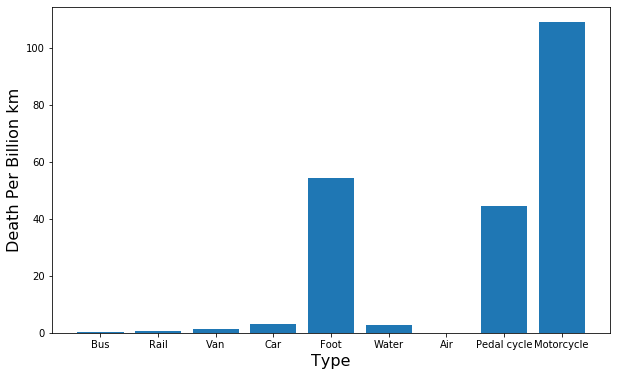

In [17]:
# Plot the Death Per Billion Km traveled

plt.figure(figsize=(10, 6))
plt.bar(death['Type'], death['km'])
plt.xlabel('Type', fontsize=16)
plt.ylabel('Death Per Billion km', fontsize=16)

In [18]:
# Create a new feature which is the total incidents from 1985 to 2014

data['total'] = data['incidents_85_99'] + data['incidents_00_14']

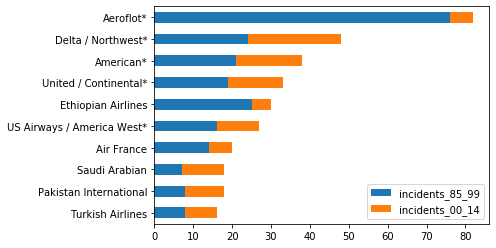

In [20]:
# Plot the top 10 airlines which have the most total incidents from 1985 to 2014

df_temp = data.sort_values(by='total', ascending=False)
df_temp[['incidents_85_99', 'incidents_00_14']][:10][::-1].plot(kind='barh', stacked=True)
_ = plt.yticks(range(10), df_temp.airline[:10][::-1])